## Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import string

import matplotlib.pyplot as plt
import seaborn as sns

import ipywidgets
from ipywidgets import interact

plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

In [7]:
data = pd.read_excel('drugs.xlsx')
data = data.drop(columns=['class','username', 'duration'])
print("The Shape of the Dataset :", data.shape)

The Shape of the Dataset : (20423, 6)


In [8]:
data.head()

,drugName,date,condition,review,rating,usefulCount
0,lexapro,"April 4, 2022",Depression,"“I have previously been on Celexa, Wellbutrin ...",10.0,0
1,lexapro,"April 3, 2022",Generalized Anxiety Disorder,“I said I would come back in a few weeks. It’s...,NaN,3
2,lexapro,"March 21, 2022",Anxiety,“Lexapro has been extremely helpful and change...,10.0,2
3,lexapro,"March 17, 2022",Anxiety,“I have been taking Lexapro for about 8 months...,10.0,1
4,lexapro,"March 16, 2022",Generalized Anxiety Disorder,“I begin taking this drug 10 years ago when I ...,10.0,18


In [10]:
# Explore Some of the Important Columns in the dataset

print("Number of Unique Drugs present in the Dataset :", data['drugName'].nunique())
print("Number of Unique Medical Conditions present in the Dataset :", data['condition'].nunique())

print("\nThe Time Period of Collecting the Data")
print("Starting Date :", data['date'].min())
print("Ending Date :", data['date'].max())

Number of Unique Drugs present in the Dataset : 16
Number of Unique Medical Conditions present in the Dataset : 114

The Time Period of Collecting the Data
Starting Date : April 1, 2010
Ending Date : September 9, 2021


In [11]:
# see how many reviews are there for every condition
data.groupby('condition').count().sort_values(by='drugName',ascending=False)['drugName']

condition
Depression                                                    6377
Anxiety                                                       2459
Major Depressive Disorder                                     1733
Insomnia                                                      1249
Anxiety and Stress                                             979
                                                              ... 
Remeron (mirtazapine) for Hot Flashes                            1
Body Dysmorphic Disorder                                         1
Remeron SolTab (mirtazapine) for Major Depressive Disorder       1
Budeprion (bupropion)                                            1
Remeron SolTab (mirtazapine) for Insomnia                        1
Name: drugName, Length: 114, dtype: int64

In [12]:
def clean_condition(con):
    if 'Depress' in con:
        return 'Depression'
    if 'Anxiety' in con:
        return 'Anxiety'
    if 'ADHD' in con:
        return 'ADHD'
    if 'Pain' in con:
        return 'Pain'
    if 'Insomnia' in con:
        return 'Insomnia'
    if 'Smok' in con:
        return 'Smoking Cessation'
    if 'Panic' in con:
        return 'Panic Disorder'
    if 'Sedation' in con:
        return 'Sedation'
    else: return con

In [13]:
cleaned_condition = []
for i in range(len(data['condition'])):
    cleaned_condition.append(clean_condition(str(data['condition'][i])))

In [14]:
data['clean_condition'] = cleaned_condition

In [15]:
condition_name = data.groupby('clean_condition').count().sort_values(by='drugName',ascending=False).head(29)['drugName']
condition_name

clean_condition
Depression                          11351
Anxiety                              4672
Insomnia                             1288
Panic Disorder                        593
Obsessive Compulsive Disorder         311
Smoking Cessation                     308
Fibromyalgia                          284
Pain                                  275
Post Traumatic Stress Disorder        191
nan                                   181
Bipolar Disorder                      139
ADHD                                  131
Sedation                              126
Sexual Dysfunction, SSRI Induced       87
Premenstrual Dysphoric Disorder        77
Obesity                                37
Diabetic Peripheral Neuropathy         37
Osteoarthritis                         33
Bulimia                                31
Hot Flashes                            26
Viibryd (vilazodone)                   25
Wellbutrin XL (bupropion)              22
Trintellix (vortioxetine)              22
Headache          

In [16]:
condition_name = condition_name.drop(['Viibryd (vilazodone)', 'Wellbutrin XL (bupropion)', 'Trintellix (vortioxetine)', 
                    'Wellbutrin (bupropion)', 'Remeron (mirtazapine)', 'nan'])
len(condition_name)

23

In [17]:
condition_list=list(condition_name.index)

In [18]:
data_new = data.loc[data['clean_condition'].isin(condition_list)]

In [19]:
data_new

,drugName,date,condition,review,rating,usefulCount,clean_condition
0,lexapro,"April 4, 2022",Depression,"“I have previously been on Celexa, Wellbutrin ...",10.0,0,Depression
1,lexapro,"April 3, 2022",Generalized Anxiety Disorder,“I said I would come back in a few weeks. It’s...,NaN,3,Anxiety
2,lexapro,"March 21, 2022",Anxiety,“Lexapro has been extremely helpful and change...,10.0,2,Anxiety
3,lexapro,"March 17, 2022",Anxiety,“I have been taking Lexapro for about 8 months...,10.0,1,Anxiety
4,lexapro,"March 16, 2022",Generalized Anxiety Disorder,“I begin taking this drug 10 years ago when I ...,10.0,18,Anxiety
...,...,...,...,...,...,...,...
20418,wellbutrin,"November 12, 2009",Depression,“I have suffered from depression for about 2 y...,9.0,48,Depression
20419,wellbutrin,"November 7, 2009",Depression,“I have been taking this medicine for over a w...,10.0,80,Depression
20420,wellbutrin,"November 1, 2009",Depression,“Wellbutrin made me a bit dizzy when I first b...,9.0,35,Depression
20421,wellbutrin,"October 27, 2009",ADHD,“I have ADHD as well as epilepsy. I have taken...,1.0,24,ADHD


In [20]:
# check for Missing Values
data_new.isnull().sum()

drugName              0
date                  0
condition             0
review                0
rating             1244
usefulCount           0
clean_condition       0
dtype: int64

In [21]:
data_new = data_new.dropna()
data_new.isnull().sum().sum()

0

In [22]:
data_new.shape

(18814, 7)

In [47]:
print("The Shape of the Dataset :", data_new.shape)

The Shape of the Dataset : (18814, 9)


## EDA

### Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


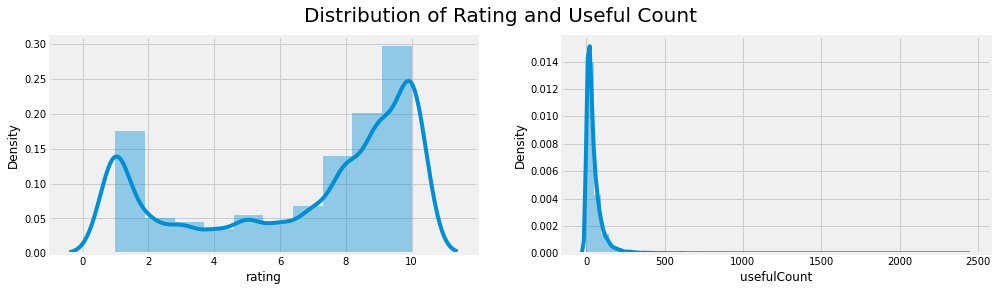

In [23]:
# check the Distribution of Rating and Useful Count

plt.rcParams['figure.figsize'] = (15, 4)

plt.subplot(1, 2, 1)
sns.distplot(data_new['rating'], bins=10)

plt.subplot(1, 2, 2)
sns.distplot(data_new['usefulCount'])

plt.suptitle('Distribution of Rating and Useful Count \n ', fontsize = 20)
plt.show()

In [24]:
# check the Highest Length Review
data_new['len']  = data_new['review'].apply(len)
print("Length of Longest Review", data_new['len'].max())
data_new['review'][data_new['len'] == data_new['len'].max()].iloc[0]

Length of Longest Review 6061


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


'“I don’t find a lot of positive stories about antidepressants, or I find stories where people are taking the antidepressant the wrong way.\n\nI wanted to share my experience.  A positive one.\n\nI’ve had generalized anxiety disorder, SEVERE OCD, and panic disorder for as long as I can remember.  My first memory of having an episode was when I was 4 years old at my kindergarten interview.  I feel as though I was born with the illnesses mentioned above, right from the womb.  When I was a child I was extremely anxious, had bad separation anxiety from my parents and had extreme OCD, I was just a kid and thought that the way I was feeling is how all kids felt, I didn’t realize that I was different.  This went on, and got even worse in middle school.  I began developing trichtilomania in middle school.  In high school I went from being a 90% above student, to failing every class within a couple of years.  I couldn’t leave the house.  My panic disorder and gad caused debilitating physical sy

### Total number of Reviews posted each day

In [25]:
data_new=data_new.sort_values(by='date')

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_chisquare
from scipy.stats import chisquare
import pickle
from bs4 import BeautifulSoup
from collections import defaultdict
import requests
from statsmodels.stats.multitest import fdrcorrection_twostage
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


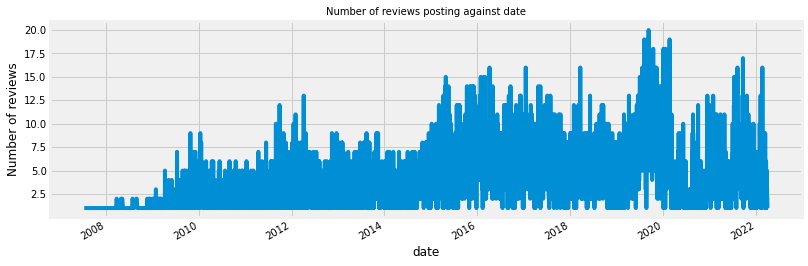

In [27]:
data['date'] = pd.to_datetime(data['date'])
data.groupby('date').size().plot(figsize=(12,4))
plt.ylabel('Number of reviews')
plt.title("Number of reviews posting against date",fontsize=10)
plt.savefig("num_reviews_date.png")

### Total number of Reviews posted each month

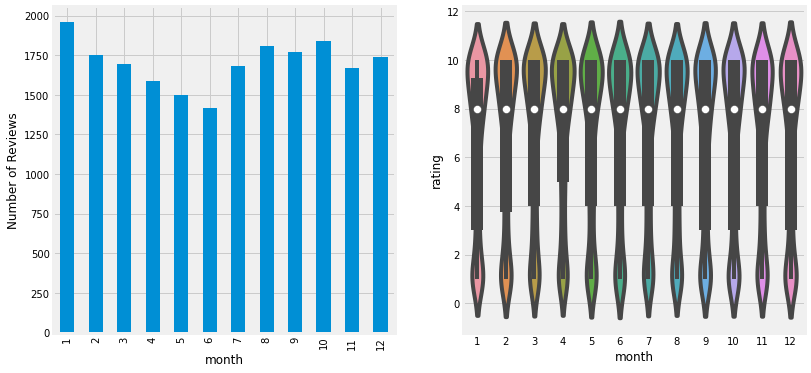

In [28]:
data['month'] = data['date'].apply(lambda x: x.month)

plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
data.groupby('month').size().plot(kind='bar')
plt.ylabel('Number of Reviews')

plt.subplot(1, 2, 2)
sns.violinplot(data=data,x='month',y='rating')

### Total number of Reviews for each condition

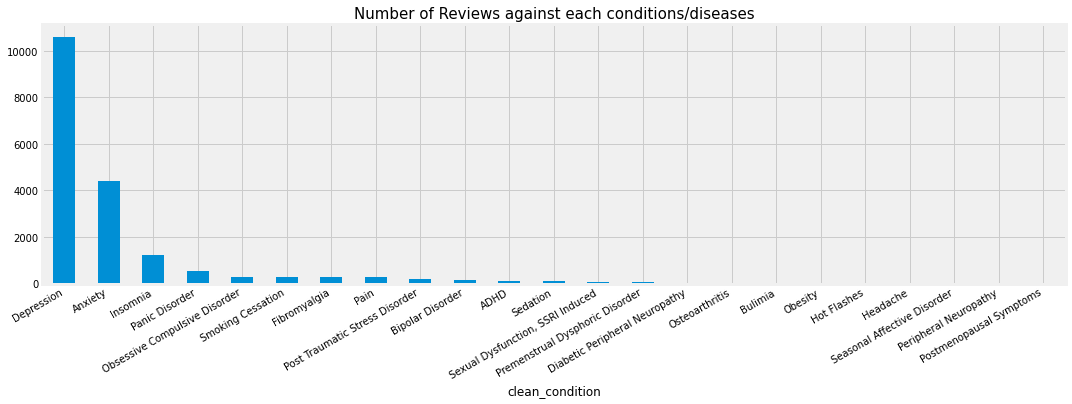

In [29]:
data_new['date'] = pd.to_datetime(data_new['date'])
data_new['month'] = data_new['date'].apply(lambda x: x.month)
df_con_mon = pd.DataFrame(data_new.groupby(['clean_condition','month']).size()).reset_index()

df_con_mon_pivot = df_con_mon.pivot_table(index='clean_condition',columns='month',values=0)

fig = plt.figure(figsize=(15,5))
df_con_mon_pivot.sum(1).sort_values(ascending=False).iloc[:50].plot(kind='bar')
plt.title("Number of Reviews against each conditions/diseases",fontsize=15)
plt.tight_layout()
fig.autofmt_xdate(bottom=0.2, rotation=30, ha='right')
plt.xticks(fontsize=10)

plt.savefig("num_reviews_each_condition.png")

In [30]:
df_con_mon_pivot.sum(1).sort_values(ascending=False)

clean_condition
Depression                          10607.0
Anxiety                              4416.0
Insomnia                             1216.0
Panic Disorder                        556.0
Obsessive Compulsive Disorder         291.0
Smoking Cessation                     288.0
Fibromyalgia                          263.0
Pain                                  263.0
Post Traumatic Stress Disorder        181.0
Bipolar Disorder                      135.0
ADHD                                  128.0
Sedation                              115.0
Sexual Dysfunction, SSRI Induced       80.0
Premenstrual Dysphoric Disorder        71.0
Diabetic Peripheral Neuropathy         35.0
Osteoarthritis                         31.0
Bulimia                                29.0
Obesity                                26.0
Hot Flashes                            25.0
Headache                               19.0
Seasonal Affective Disorder            16.0
Peripheral Neuropathy                  14.0
Postmenopausal S

### Total number of Reviews for each condition against each month

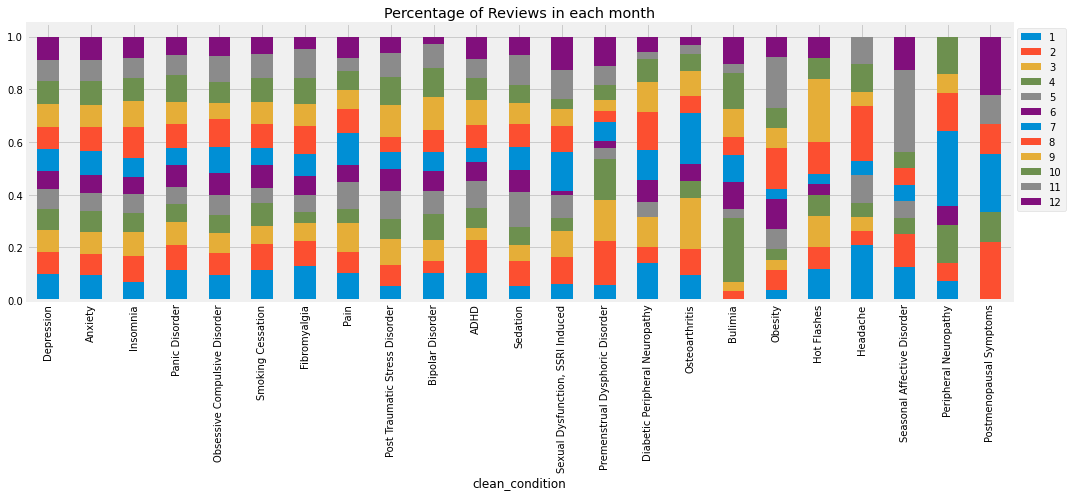

In [31]:
n = 50
top_n_index = df_con_mon_pivot.sum(1).sort_values(ascending=False).iloc[:n].index
tm_con_mon_pivot = df_con_mon_pivot.loc[top_n_index]
tm_con_mon_pivot_per = tm_con_mon_pivot.div(tm_con_mon_pivot.sum(1), axis=0)
tm_con_mon_pivot_per.plot.bar(stacked=True, figsize=(15,7))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Percentage of Reviews in each month")
plt.tight_layout()
plt.savefig("Per_Reviews_month.png")

### Number of reviews for the drugs for each condition

In [32]:
data_new[['clean_condition', 'drugName', 'usefulCount']].groupby(
    ['drugName', 'clean_condition'])['usefulCount'].count().sort_values(ascending=False).head(20)

drugName          clean_condition
bupropion         Depression         1525
lexapro           Anxiety            1293
mtm/vortioxetine  Depression         1227
trintellix        Depression          904
trazodone         Insomnia            807
mtm/vilazodone    Depression          742
pristiq           Depression          720
mirtazapine       Depression          718
viibryd           Depression          714
zoloft            Depression          693
lexapro           Depression          633
cymbalta          Depression          599
wellbutrin        Depression          554
prozac            Depression          475
paxil             Anxiety             468
mirtazapine       Anxiety             455
celexa            Anxiety             416
mirtazapine       Insomnia            409
effexor           Depression          399
cymbalta          Anxiety             369
Name: usefulCount, dtype: int64

In [49]:
# for depression
print('Depression')
print(data_new.loc[data_new['clean_condition']=='Depression'].groupby(
    ['drugName'])['usefulCount'].count().sort_values(ascending=False).head(20))

Depression
drugName
bupropion           1525
mtm/vortioxetine    1227
trintellix           904
mtm/vilazodone       742
pristiq              720
mirtazapine          718
viibryd              714
zoloft               693
lexapro              633
cymbalta             599
wellbutrin           554
prozac               475
effexor              399
celexa               344
paxil                213
trazodone            147
Name: usefulCount, dtype: int64


In [34]:
# for anxiety
data_new.loc[data_new['clean_condition']=='Anxiety'].groupby(
    ['drugName'])['usefulCount'].count().sort_values(ascending=False).head(20)

drugName
lexapro           1293
paxil              468
mirtazapine        455
celexa             416
cymbalta           369
prozac             354
effexor            348
zoloft             311
bupropion          159
trazodone          115
pristiq             64
mtm/vilazodone      57
wellbutrin           4
viibryd              3
Name: usefulCount, dtype: int64

In [35]:
# for insomnia
data_new.loc[data_new['clean_condition']=='Insomnia'].groupby(
    ['drugName'])['usefulCount'].count().sort_values(ascending=False).head(20)

drugName
trazodone      807
mirtazapine    409
Name: usefulCount, dtype: int64

In [36]:
# for panic disorder
data_new.loc[data_new['clean_condition']=='Panic Disorder'].groupby(
    ['drugName'])['usefulCount'].count().sort_values(ascending=False).head(20)

drugName
zoloft        320
paxil          85
prozac         70
effexor        41
bupropion      21
celexa         10
pristiq         6
wellbutrin      3
Name: usefulCount, dtype: int64

Adding up the useful counts, we get a sense of how many people are viewing the reviews for the drug for each condition.

In [37]:
data_new[['clean_condition', 'drugName','usefulCount']].groupby(
    ['drugName', 'clean_condition'])['usefulCount'].sum().sort_values(ascending=False).head(20)

drugName          clean_condition
lexapro           Anxiety            73753
bupropion         Depression         71322
zoloft            Depression         45097
mtm/vortioxetine  Depression         44278
trintellix        Depression         40733
wellbutrin        Depression         36699
trazodone         Insomnia           35774
celexa            Anxiety            34852
prozac            Depression         32217
lexapro           Depression         32002
prozac            Anxiety            31454
pristiq           Depression         27084
viibryd           Depression         26799
cymbalta          Depression         26695
mtm/vilazodone    Depression         26336
paxil             Anxiety            25719
mirtazapine       Depression         25396
cymbalta          Anxiety            22089
mirtazapine       Anxiety            19927
effexor           Anxiety            18950
Name: usefulCount, dtype: int64

In [38]:
# for depression
data_new.loc[data_new['clean_condition']=='Depression'].groupby(
    ['drugName'])['usefulCount'].sum().sort_values(ascending=False).head(20)

drugName
bupropion           71322
zoloft              45097
mtm/vortioxetine    44278
trintellix          40733
wellbutrin          36699
prozac              32217
lexapro             32002
pristiq             27084
viibryd             26799
cymbalta            26695
mtm/vilazodone      26336
mirtazapine         25396
celexa              18080
effexor             14614
paxil                8353
trazodone            8310
Name: usefulCount, dtype: int64

In [39]:
# for anxiety
data_new.loc[data_new['clean_condition']=='Anxiety'].groupby(
    ['drugName'])['usefulCount'].sum().sort_values(ascending=False).head(20)

drugName
lexapro           73753
celexa            34852
prozac            31454
paxil             25719
cymbalta          22089
mirtazapine       19927
effexor           18950
zoloft            15971
bupropion          7040
trazodone          7027
pristiq            1612
mtm/vilazodone      944
wellbutrin          439
viibryd             139
Name: usefulCount, dtype: int64

In [40]:
# for insomnia
data_new.loc[data_new['clean_condition']=='Insomnia'].groupby(
    ['drugName'])['usefulCount'].sum().sort_values(ascending=False).head(20)

drugName
trazodone      35774
mirtazapine    16036
Name: usefulCount, dtype: int64

In [41]:
# for panic disorder
data_new.loc[data_new['clean_condition']=='Panic Disorder'].groupby(
    ['drugName'])['usefulCount'].sum().sort_values(ascending=False).head(20)

drugName
zoloft        16405
prozac         3787
paxil          2824
effexor        1246
bupropion       864
celexa          506
wellbutrin      300
pristiq          69
Name: usefulCount, dtype: int64

### Average ratings of Drugs

In [42]:
data_new[['clean_condition', 'drugName','rating']].groupby(
    ['drugName', 'clean_condition'])['rating'].mean().sort_values(ascending=False).head(20)

drugName    clean_condition                 
pristiq     Postmenopausal Symptoms             10.000000
celexa      Premenstrual Dysphoric Disorder      9.500000
paxil       Hot Flashes                          9.250000
lexapro     Obsessive Compulsive Disorder        9.100000
effexor     Premenstrual Dysphoric Disorder      9.000000
lexapro     Premenstrual Dysphoric Disorder      9.000000
pristiq     ADHD                                 9.000000
            Obesity                              9.000000
effexor     Obsessive Compulsive Disorder        9.000000
prozac      Hot Flashes                          9.000000
pristiq     Post Traumatic Stress Disorder       8.857143
effexor     Hot Flashes                          8.833333
bupropion   Seasonal Affective Disorder          8.812500
celexa      Obsessive Compulsive Disorder        8.750000
wellbutrin  Sexual Dysfunction, SSRI Induced     8.666667
bupropion   Premenstrual Dysphoric Disorder      8.666667
lexapro     Fibromyalgia   

In [43]:
# for depression
data_new.loc[data_new['clean_condition']=='Depression'].groupby(
    ['drugName'])['rating'].mean().sort_values(ascending=False).head(20)

drugName
celexa              7.098837
lexapro             7.034755
bupropion           6.967869
prozac              6.936842
zoloft              6.904762
wellbutrin          6.826715
mirtazapine         6.745125
trazodone           6.734694
pristiq             6.695833
paxil               6.539906
effexor             6.451128
cymbalta            6.160267
mtm/vortioxetine    5.975550
trintellix          5.951327
viibryd             5.834734
mtm/vilazodone      5.781671
Name: rating, dtype: float64

In [44]:
# for anxiety
data_new.loc[data_new['clean_condition']=='Anxiety'].groupby(
    ['drugName'])['rating'].mean().sort_values(ascending=False).head(20)

drugName
lexapro           7.737046
celexa            7.411058
zoloft            7.344051
prozac            7.285311
pristiq           7.281250
paxil             7.151709
wellbutrin        7.000000
effexor           6.977011
trazodone         6.730435
viibryd           6.666667
mirtazapine       6.567033
cymbalta          6.390244
mtm/vilazodone    6.052632
bupropion         5.823899
Name: rating, dtype: float64

In [45]:
# for insomnia
data_new.loc[data_new['clean_condition']=='Insomnia'].groupby(
    ['drugName'])['rating'].mean().sort_values(ascending=False).head(20)

drugName
mirtazapine    7.002445
trazodone      6.235440
Name: rating, dtype: float64

In [46]:
# for panic disorder
data_new.loc[data_new['clean_condition']=='Panic Disorder'].groupby(
    ['drugName'])['rating'].mean().sort_values(ascending=False).head(20)

drugName
celexa        7.900000
pristiq       7.833333
bupropion     7.666667
zoloft        7.509375
paxil         7.376471
prozac        6.742857
effexor       6.536585
wellbutrin    5.333333
Name: rating, dtype: float64